# ANOVA Case Study 2 - Insurance Customer Waiting Time
An insurance company wants to check whether the waiting time of customer at their single window operation across 4 cities is same or not. The data is given in Insurance_waiting_time.csv


* Branches : 1,2,3,4
* Response: Waiting Time

In [1]:
# Loading the relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Reading the Sales revenue data.
data = pd.read_csv('Insurance_waiting_time.csv')
data.head()

,Branch,Waiting_Time
0,1,1.0
1,1,0.9
2,1,1.0
3,1,1.4
4,1,1.2


In [3]:
data.groupby('Branch')['Waiting_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
1,12.0,1.158333,0.387201,0.5,0.975,1.1,1.450,1.8
2,15.0,1.913333,0.417247,0.9,1.700,1.9,2.200,2.5
3,10.0,1.710000,0.481779,0.7,1.550,1.8,1.975,2.4
4,13.0,2.469231,0.303822,2.0,2.300,2.4,2.600,3.0


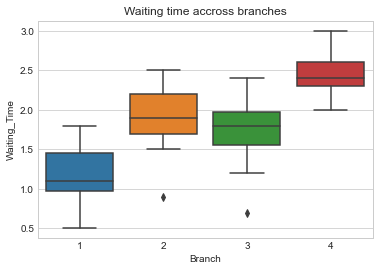

In [4]:
sns.boxplot(x = "Branch", y = "Waiting_Time", data = data)
plt.title('Waiting time accross branches')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ = $\mu4$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$, $\mu3$ and $\mu4$ are the average waiting times from branches 1, 2, 3 and 4 respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [5]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Waiting_Time ~ Branch', data = data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

            sum_sq    df         F        PR(>F)
Branch    8.715891   1.0  43.85672  2.790414e-08
Residual  9.539309  48.0       NaN           NaN


In [6]:
assert 2.790414e-08 < 0.05

### Step 5:  Decide to reject or fail to reject null hypothesis
In this example, p value is 2.790414e-08 and it is less than our chosen level of signifance at 5%

So the decision is: We reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence  to reject the null hypothesis that all branches are same in terms of waiting time.